# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Irendra Lintang Keksi
- **Email:** mikalintang@gmail.com
- **ID Dicoding:** irendra_lintang_keksi_3gk7

## Pertanyaan Bisnis



1.   Bagaimana tren konsentrasi PM2.5 dari waktu ke waktu, dan apakah ada korelasi dengan perubahan suhu?
2.   Bagaimana kondisi cuaca (kecepatan angin, hujan, dan suhu) mempengaruhi tingkat PM2.5 dan PM10?

## Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [3]:
data_url = 'https://drive.google.com/uc?id=1xfGv_YmMl7ZUrRuU6Y4Fwg6bD730SbiH'
data = pd.read_csv(data_url)

**Insight:**
- Mengumpulkan data kualitas udara dari url drive PRSA_Data_Guanyuan_20130301-20170228.csv.
- Dataset mencakup pengukuran dari Guanyuan, China, antara 1 Maret 2013 hingga 28 Februari 2017.
- Termasuk polutan dan variabel terkait cuaca.

### Assessing Data

In [4]:
print("Lima baris pertama dataset:")
print(data.head())

Lima baris pertama dataset:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan  


In [5]:
print("\nInfo Dataset:")
print(data.info())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [6]:
print("\nJumlah Nilai Hilang per Kolom:")
print(data.isnull().sum())


Jumlah Nilai Hilang per Kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [7]:
print("\nRingkasan Statistik dari Data:")
print(data.describe())


Ringkasan Statistik dari Data:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497

**Insight:**
- Menampilkan lima baris pertama dari dataset untuk memberikan gambaran awal tentang struktur dan isi data.
- Menampilkan informasi umum tentang dataset, termasuk jumlah baris, kolom, tipe data, dan penggunaan memori.
- Menghitung dan menampilkan jumlah nilai hilang untuk setiap kolom.
- Menyediakan ringkasan statistik, termasuk nilai minimum, maksimum, rata-rata, dan kuartil dari kolom numerik, untuk memahami distribusi dan variasi data.

### Cleaning Data

In [8]:
# Mengisi nilai hilang pada polutan dan kondisi cuaca dengan median
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
kolom_cuaca = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for kolom in polutan + kolom_cuaca:
    data[kolom].fillna(data[kolom].median(), inplace=True)

In [9]:
# Mengisi nilai hilang untuk 'wd' (arah angin) dengan nilai modus (nilai paling sering muncul)
data['wd'].fillna(data['wd'].mode()[0], inplace=True)

In [10]:
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

**Insight:**
- Nilai hilang untuk kolom polutan (PM2.5, PM10, SO2, NO2, CO, O3) dan kolom kondisi cuaca (TEMP, PRES, DEWP, RAIN, WSPM) diisi dengan nilai median.
- Nilai hilang untuk kolom wd (arah angin) diisi dengan modus, yaitu nilai yang paling sering muncul.
- Kolom year, month, day, dan hour dikonversi menjadi format datetime, yang memudahkan analisis dan visualisasi data berdasarkan waktu.

## Exploratory Data Analysis (EDA)

### Explore Tren PM2.5 dari waktu ke waktu dan hubungannya dengan suhu

In [11]:
# Menghitung rata-rata bulanan dari PM2.5 dan suhu
data_tren = data.groupby(['year', 'month']).agg({'PM2.5':'mean', 'TEMP':'mean'}).reset_index()

data_tren['tanggal'] = pd.to_datetime(data_tren[['year', 'month']].assign(day=1))

# Menghitung korelasi antara PM2.5 dan Suhu
korelasi_pm25_temp = data_tren[['PM2.5', 'TEMP']].corr().iloc[0, 1]
print(f"Korelasi antara PM2.5 dan Suhu: {korelasi_pm25_temp}")

Korelasi antara PM2.5 dan Suhu: -0.5179328437124068


### Explore Korelasi antara kondisi cuaca (kecepatan angin, hujan, suhu) dengan PM2.5 dan PM10

In [12]:
kolom_korelasi_cuaca = ['PM2.5', 'PM10', 'TEMP', 'RAIN', 'WSPM']
matriks_korelasi_cuaca = data[kolom_korelasi_cuaca].corr()

print("\nMatriks Korelasi untuk PM2.5, PM10, dan Kondisi Cuaca:")
print(matriks_korelasi_cuaca)


Matriks Korelasi untuk PM2.5, PM10, dan Kondisi Cuaca:
          PM2.5      PM10      TEMP      RAIN      WSPM
PM2.5  1.000000  0.884360 -0.128586 -0.010522 -0.281416
PM10   0.884360  1.000000 -0.091988 -0.026132 -0.188517
TEMP  -0.128586 -0.091988  1.000000  0.036598  0.037910
RAIN  -0.010522 -0.026132  0.036598  1.000000  0.022467
WSPM  -0.281416 -0.188517  0.037910  0.022467  1.000000


**Insight:**
- Menghitung rata-rata bulanan untuk konsentrasi PM2.5 dan suhu (TEMP) dengan menggunakan fungsi groupby().
- Menambahkan kolom tanggal dengan format datetime yang merepresentasikan hari pertama setiap bulan.
- Menghitung korelasi antara PM2.5 dan suhu menggunakan metode corr(), yang memberikan informasi tentang seberapa besar hubungan linier antara kedua variabel.
- Menghitung matriks korelasi untuk PM2.5, PM10, TEMP, RAIN, dan WSPM, untuk mengidentifikasi hubungan antar variabel dan faktor-faktor cuaca yang mungkin memengaruhi kualitas udara.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

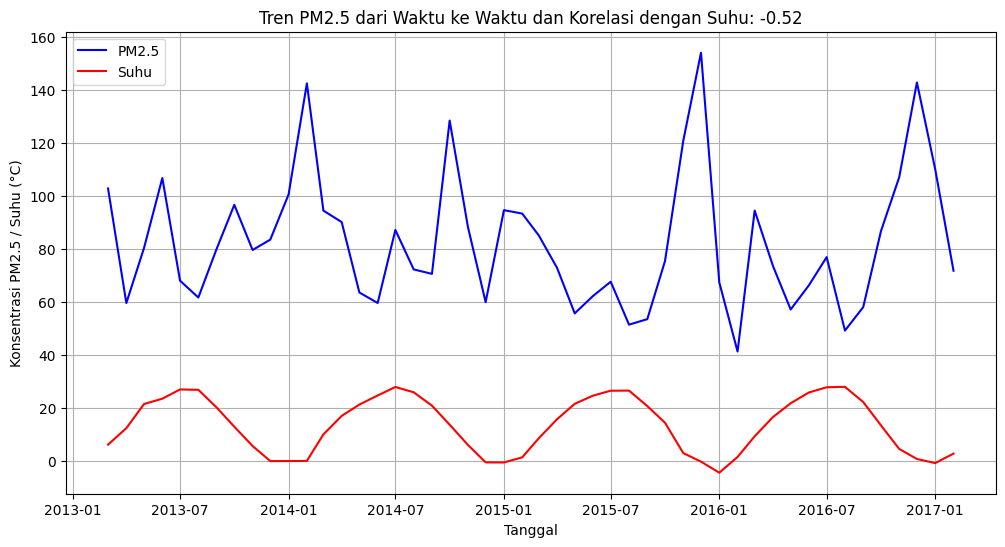

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(data_tren['tanggal'], data_tren['PM2.5'], color='blue', label='PM2.5')

plt.plot(data_tren['tanggal'], data_tren['TEMP'], color='red', label='Suhu')

plt.title(f'Tren PM2.5 dari Waktu ke Waktu dan Korelasi dengan Suhu: {korelasi_pm25_temp:.2f}')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi PM2.5 / Suhu (°C)')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2:

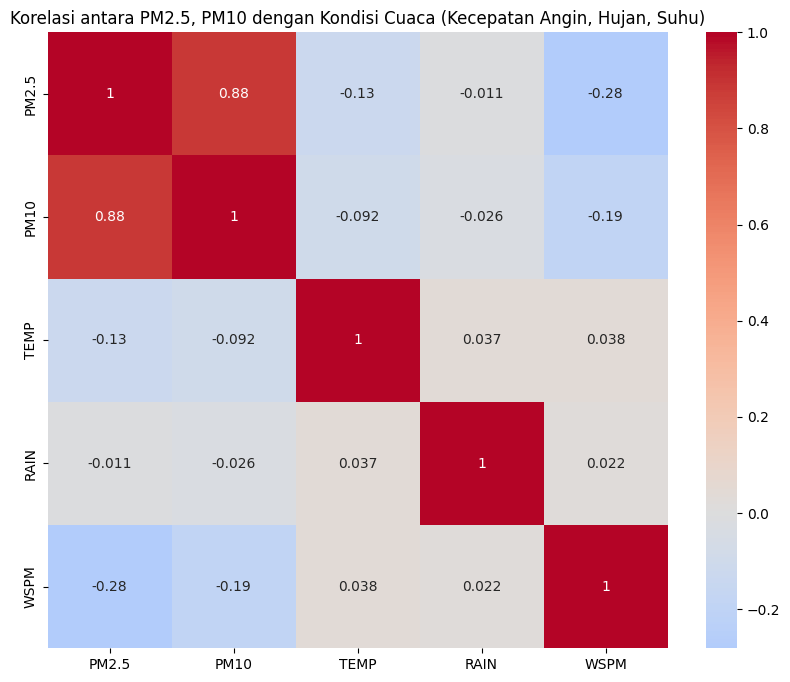

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriks_korelasi_cuaca, annot=True, cmap="coolwarm", center=0)
plt.title('Korelasi antara PM2.5, PM10 dengan Kondisi Cuaca (Kecepatan Angin, Hujan, Suhu)')
plt.show()

**Insight:**
- Grafik menunjukkan tren PM2.5 dan suhu dari waktu ke waktu, dengan PM2.5 digambarkan dalam warna biru dan suhu dalam warna merah.
- Heatmap menyajikan hubungan antar variabel (PM2.5, PM10, suhu, kecepatan angin, dan hujan) dengan menampilkan nilai korelasi dalam setiap sel.

## Analisis Lanjutan: Clustering (Binning)

Dalam analisis *Air Quality Dataset*, *clustering* digunakan untuk mengkategorikan level PM2.5 ke dalam kelompok-kelompok yang sudah ditentukan, yang selanjutnya disebut sebagai kualitas udara. Nilai PM2.5 dibagi menjadi beberapa kategori yang masing-masing merepresentasikan level kualitas udara yang didefinisikan dengan batasan tertentu berikut:


---


- *Good* : PM2.5 <= 12 µg/m³
- *Moderate* : 12 < PM2.5 <= 35.4 µg/m³
- *Unhealthy for Sensitive Groups* : 35.5 < PM2.5 <= 55.4 µg/m³
- *Unhealthy* : 55.5 < PM2.5 <= 150.4 µg/m³
- *Very Unhealthy* : 150.5 < PM2.5 <= 250.4 µg/m³
- *Hazardous* : PM2.5 > 250.4 µg/m³


---



In [15]:
def categorize_pm25(value):
    if value <= 12:
        return 'Good'
    elif value <= 35.4:
        return 'Moderate'
    elif value <= 55.4:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 150.4:
        return 'Unhealthy'
    elif value <= 250.4:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

In [16]:
data['PM2.5_Category'] = data['PM2.5'].apply(categorize_pm25)

# Menghitung jumlah untuk setiap kategori
kategori_count = data['PM2.5_Category'].value_counts()

print("\nJumlah data untuk setiap kategori PM2.5:")
print(kategori_count)


Jumlah data untuk setiap kategori PM2.5:
PM2.5_Category
Unhealthy                         13132
Moderate                           7685
Unhealthy for Sensitive Groups     4574
Good                               4242
Very Unhealthy                     3871
Hazardous                          1560
Name: count, dtype: int64


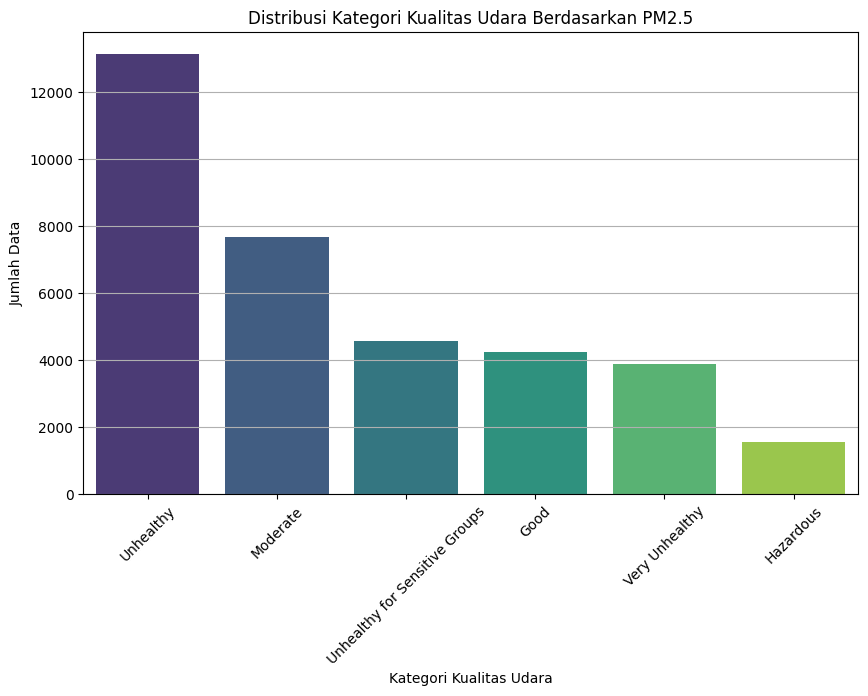

In [20]:
# Visualisasi Data
kategori_count_df = kategori_count.reset_index()
kategori_count_df.columns = ['Kategori', 'Jumlah']

plt.figure(figsize=(10, 6))
sns.barplot(data=kategori_count_df, x='Kategori', y='Jumlah', hue='Kategori', palette='viridis', dodge=False)
plt.title('Distribusi Kategori Kualitas Udara Berdasarkan PM2.5')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend([], [], frameon=False)
plt.show()

- Analisis clustering menggunakan binning menghasilkann output yang akan memberikan gambaran jelas tentang kualitas udara di area Guanyuan.
- Kategori kualitas udara dapat digunakan untuk memberikan rekomendasi kesehatan atau pengambilan keputusan terkait kebijakan lingkungan, terutama bagi mereka yang berada di area dengan kategori Unhealthy dan Hazardous.

## Conclusion

### Conclusion pertanyaan 1
##### Tren PM2.5 menunjukkan adanya variasi yang signifikan selama periode waktu tertentu, dan suhu memiliki sedikit hubungan negatif dengan konsentrasi PM2.5. Suhu yang lebih tinggi cenderung sedikit mengurangi kadar PM2.5, tetapi faktor ini bukanlah satu-satunya yang mempengaruhi konsentrasi polutan.


---


### Conclusion pertanyaan 2
##### Kondisi cuaca, khususnya kecepatan angin, memiliki dampak yang signifikan dalam menurunkan konsentrasi polutan seperti PM2.5 dan PM10. Angin kencang cenderung membersihkan udara dari polusi. Hujan, di sisi lain, memiliki pengaruh yang sangat kecil terhadap kadar polusi. Suhu juga sedikit mempengaruhi konsentrasi polutan, tetapi tidak signifikan.